<a href="https://colab.research.google.com/github/bodduhemalatha/IBM-Cyber-Security/blob/main/alexnet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import keras
keras.__version__

'2.14.0'

In [2]:
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

In [6]:
len(train_data)

8982

In [4]:
len(test_data)

2246

In [5]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

In [7]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

550378/550378 [==============================] - 0s 1us/step


In [8]:
decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [9]:
train_labels[10]

3

In [12]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

x_train,x_train.shape,x_train.ndim

(array([[0., 1., 1., ..., 0., 0., 0.],
        [0., 1., 1., ..., 0., 0., 0.],
        [0., 1., 1., ..., 0., 0., 0.],
        ...,
        [0., 1., 1., ..., 0., 0., 0.],
        [0., 1., 1., ..., 0., 0., 0.],
        [0., 1., 1., ..., 0., 0., 0.]]),
 (8982, 10000),
 2)

In [13]:
import numpy as np

def vectorize_sequences(sequences, dimension=10):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
data=[1,2,4,9,0]
x= vectorize_sequences(data)
x,x.shape,x.ndim

(array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]]),
 (5, 10),
 2)

In [14]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results
one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)
one_hot_train_labels,one_hot_train_labels.shape,one_hot_train_labels.ndim

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 (8982, 46),
 2)

In [15]:
from keras.utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [16]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [17]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [18]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [19]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 3s 119ms/step - loss: 2.7265 - accuracy: 0.5005 - val_loss: 1.8230 - val_accuracy: 0.6170
Epoch 2/20
16/16 [==============================] - 1s 51ms/step - loss: 1.5430 - accuracy: 0.6708 - val_loss: 1.3730 - val_accuracy: 0.6850
Epoch 3/20
16/16 [==============================] - 1s 50ms/step - loss: 1.1750 - accuracy: 0.7423 - val_loss: 1.2001 - val_accuracy: 0.7200
Epoch 4/20
16/16 [==============================] - 1s 49ms/step - loss: 0.9616 - accuracy: 0.7957 - val_loss: 1.0644 - val_accuracy: 0.7680
Epoch 5/20
16/16 [==============================] - 1s 49ms/step - loss: 0.7969 - accuracy: 0.8296 - val_loss: 1.0004 - val_accuracy: 0.7920
Epoch 6/20
16/16 [==============================] - 1s 48ms/step - loss: 0.6638 - accuracy: 0.8557 - val_loss: 0.9337 - val_accuracy: 0.8040
Epoch 7/20
16/16 [==============================] - 1s 49ms/step - loss: 0.5536 - accuracy: 0.8799 - val_loss: 0.9098 - val_accuracy: 0.8110
Epoch 8/20
1

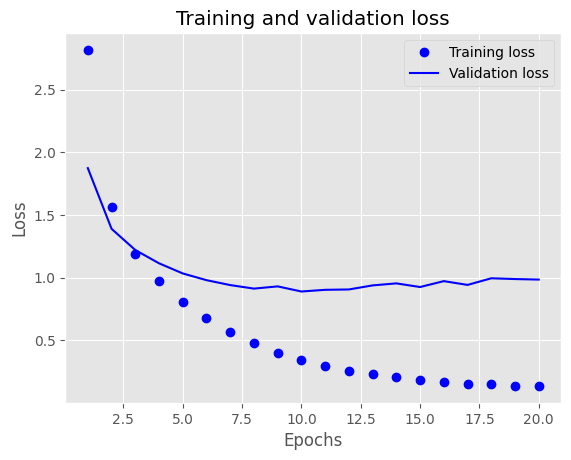

In [ ]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [ ]:
plt.clf()
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

KeyError: ignored

<Figure size 640x480 with 0 Axes>

In [ ]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=8,
          batch_size=512,
          validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

Epoch 1/8
16/16 [==============================] - 1s 38ms/step - loss: 2.7164 - accuracy: 0.4539 - val_loss: 1.8083 - val_accuracy: 0.6090
Epoch 2/8
16/16 [==============================] - 0s 29ms/step - loss: 1.5481 - accuracy: 0.6725 - val_loss: 1.3914 - val_accuracy: 0.6750
Epoch 3/8
16/16 [==============================] - 0s 27ms/step - loss: 1.2115 - accuracy: 0.7306 - val_loss: 1.2032 - val_accuracy: 0.7270
Epoch 4/8
16/16 [==============================] - 0s 30ms/step - loss: 0.9922 - accuracy: 0.7835 - val_loss: 1.1058 - val_accuracy: 0.7690
Epoch 5/8
16/16 [==============================] - 0s 28ms/step - loss: 0.8288 - accuracy: 0.8212 - val_loss: 1.0204 - val_accuracy: 0.7800
Epoch 6/8
16/16 [==============================] - 0s 28ms/step - loss: 0.6928 - accuracy: 0.8503 - val_loss: 0.9752 - val_accuracy: 0.7910
Epoch 7/8
16/16 [==============================] - 0s 28ms/step - loss: 0.5789 - accuracy: 0.8763 - val_loss: 0.9142 - val_accuracy: 0.8010
Epoch 8/8
71/71 [===

In [ ]:
results

[0.974617063999176, 0.784060537815094]

In [ ]:
import copy

test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
float(np.sum(np.array(test_labels) == np.array(test_labels_copy))) / len(test_labels)

0.1794300979519145

In [ ]:
predictions = model.predict(x_test)

71/71 [==============================] - 0s 2ms/step


In [ ]:
predictions[0].shape

(46,)

In [ ]:
np.sum(predictions[0])

1.0000001

In [ ]:
np.argmax(predictions[0])

3

In [ ]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)
y_train,y_train.shape,y_train.ndim

(array([ 3,  4,  3, ..., 25,  3, 25]), (8982,), 1)

In [ ]:
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['acc'])

In [ ]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val, y_val))

Epoch 1/20
63/63 [==============================] - 2s 24ms/step - loss: 3.2730 - accuracy: 0.2271 - val_loss: 2.6718 - val_accuracy: 0.3320
Epoch 2/20
63/63 [==============================] - 1s 19ms/step - loss: 2.0510 - accuracy: 0.6090 - val_loss: 1.6584 - val_accuracy: 0.6720
Epoch 3/20
63/63 [==============================] - 1s 10ms/step - loss: 1.3499 - accuracy: 0.7057 - val_loss: 1.4132 - val_accuracy: 0.6830
Epoch 4/20
63/63 [==============================] - 1s 9ms/step - loss: 1.1681 - accuracy: 0.7211 - val_loss: 1.3327 - val_accuracy: 0.7000
Epoch 5/20
63/63 [==============================] - 1s 10ms/step - loss: 1.0645 - accuracy: 0.7353 - val_loss: 1.3147 - val_accuracy: 0.6950
Epoch 6/20
63/63 [==============================] - 1s 9ms/step - loss: 0.9850 - accuracy: 0.7483 - val_loss: 1.3003 - val_accuracy: 0.6970
Epoch 7/20
63/63 [==============================] - 1s 10ms/step - loss: 0.9178 - accuracy: 0.7536 - val_loss: 1.2927 - val_accuracy: 0.7060
Epoch 8/20
63/6